<a href="https://colab.research.google.com/github/deep1003/deep1003/blob/master/Week_06_Statistical_Analysis_1011_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Colab User Guide**

**Colab 단축키**

In [29]:
# Colab 단축키
# Ctrl + S (저장)
# Ctrl + Enter (셀하나 실행)
# Ctrl + Shift + Enter (선택한 코드만 실행)
# Ctrl + F9 (전체실행)
# Ctrl + F8 (현재 셀 포함 이전 전체 실행)
# Ctrl + F10 (현재 셀 포함 이후 전체 실행)

**패키지 설치** (Colab은 새로 시작할 때마다 패키지를 설치하고, 라이브러리를 불러와야 한다.)

In [30]:
# Colab에 기본적으로 설치된 라이브러리: pandas, matplotlib, numpy
# 설치가 필요한 라이브러리: networkx, seaborn
# Colab에서는 '!'를 사용해야 한다.

!pip install seaborn
!pip install networkx


**라이브러리 불러오기**

In [31]:
# pandas 라이브러리를 'pd'로 가져오기 (데이터 처리)
import pandas as pd
# matplotlib의 pyplot 모듈을 'plt'로 가져오기 (그래프 시각화)
import matplotlib.pyplot as plt
# numpy 라이브러리를 'np'로 가져오기 (수치 연산)
import numpy as np
# seaborn 라이브러리를 'sns'로 가져오기 (통계적 데이터 시각화)
import seaborn as sns
# networkx 라이브러리를 'nx'로 가져오기 (네트워크 분석)
import networkx as nx

##**1. Descriptive Statistics**

##**1.2 Variance (분산)**

In [32]:
# 예제 데이터
x = np.array([10, 20, 30, 40, 50])  # 데이터 벡터

# 한 벡터의 분산 계산 함수
def calculate_variance(x):
    # 벡터의 길이를 n에 저장
    n = len(x)

    # x 벡터의 평균 계산
    x_mean = np.mean(x)

    # 분산 계산: (x - x평균)의 제곱을 더한 후, n-1로 나눔
    variance = np.sum((x - x_mean) ** 2) / (n - 1)

    # 계산된 분산 반환
    return variance

# calculate_variance 함수로 x의 분산 계산
var = calculate_variance(x)

# 계산된 분산 출력
print(f"분산: {var}")


분산: 250.0


##**2. Correlation**

##**2.1 Covariance (공분산)**

In [33]:
# 예제 데이터
x = np.array([10, 20, 30, 40, 50])  # 첫 번째 데이터 벡터
y = np.array([15, 25, 35, 45, 55])  # 두 번째 데이터 벡터

# 두 벡터 x와 y의 공분산 계산 함수
def calculate_covariance(x, y):
    # 입력된 두 벡터의 길이가 같은지 확인. 다르면 오류 발생
    if len(x) != len(y):
        raise ValueError("두 벡터의 길이는 같아야 함")

    # 벡터의 길이를 n에 저장
    n = len(x)

    # x 벡터와 y 벡터의 평균 계산
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # 공분산 계산: (x - x평균)과 (y - y평균)을 곱한 후, n-1로 나눔
    covariance = np.dot(x - x_mean, y - y_mean) / (n - 1)

    # 계산된 공분산 반환
    return covariance

# calculate_covariance 함수로 x와 y의 공분산 계산
cov = calculate_covariance(x, y)

# 계산된 공분산 출력
print(f"공분산: {cov}")


공분산: 250.0


##**2.2 Pearson Correlation**

Pearson Correlation Coefficient: 0.9538512608492794


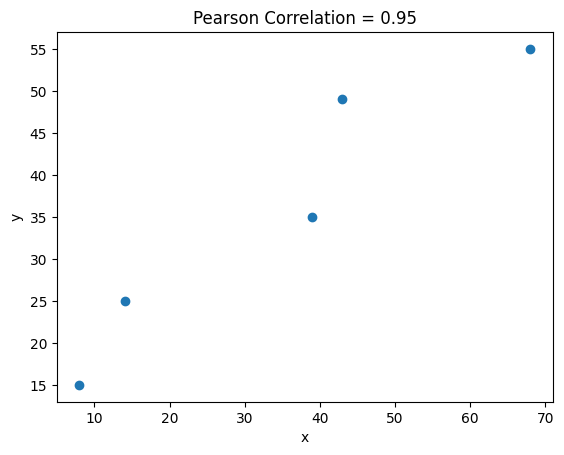

In [34]:
# 두 변수 x와 y의 상관관계를 scatter plot, Pearson 상관계수 출력

# x와 y 데이터 값 설정
x = np.array([8, 14, 39, 43, 68])
y = np.array([15, 25, 35, 49, 55])

# Pearson 상관계수를 numpy를 사용해 계산
pearson_corr = np.corrcoef(x, y)[0, 1]

# Pearson 상관계수 출력
print(f"Pearson Correlation Coefficient: {pearson_corr}")

# scatter plot 생성 (x와 y 값을 점으로 표시)
plt.scatter(x, y)

# x축, y축 라벨과 제목 추가
plt.xlabel('x')  # x축 라벨
plt.ylabel('y')  # y축 라벨
plt.title(f'Pearson Correlation = {pearson_corr:.2f}')  # 상관계수 포함한 제목

# plot 보여주기
plt.show()


##**4. Linear Regression**

##**4.2 Data Collection**

In [35]:
# @title CSV 파일 불러오기
import pandas as pd

# GitHub raw 파일 URL
url = 'https://raw.githubusercontent.com/deep1003/deep1003/master/df_combined.csv'

df_combined = pd.read_csv(url)


In [36]:
# @title 데이터 프레임 확인
print(df_combined.head())


   constant_term  num_friends  work_hours_per_day  has_PhD  minutes
0              1           49                   4        0    68.77
1              1           41                   9        0    51.25
2              1           40                   8        0    52.08
3              1           25                   6        0    38.36
4              1           21                   1        0    44.54


In [37]:
# @title output dimension of data frame
df_combined.shape

(203, 5)

In [38]:
# @title check number of nulls and data type of data frame
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   constant_term       203 non-null    int64  
 1   num_friends         203 non-null    int64  
 2   work_hours_per_day  203 non-null    int64  
 3   has_PhD             203 non-null    int64  
 4   minutes             203 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 8.1 KB


In [39]:
# @title  output variable name set of data frame
df_combined.columns

Index(['constant_term', 'num_friends', 'work_hours_per_day', 'has_PhD',
       'minutes'],
      dtype='object')

##**4.6 Results Analysis**


In [40]:
# @title  OLS 회귀분석을 수행하는 코드
# 종속변수(Y): 'minutes'
# 설명변수(X): 'num_friends', 'work_hours_per_day', 'has_PhD'
# 상수항을 추가한 후 OLS 회귀모형을 적합

# statsmodels 라이브러리를 사용하여 OLS 회귀분석 수행
import statsmodels.api as sm

# 종속변수 (Y): 'minutes' 열을 사용
y = df_combined['minutes']

# 설명변수 (X): 'num_friends', 'work_hours_per_day', 'has_PhD' 열을 사용
X = df_combined[['num_friends', 'work_hours_per_day', 'has_PhD']]

# 상수항(constant)을 추가 (OLS 회귀분석에서는 상수항을 포함하는 것이 일반적)
X = sm.add_constant(X)

# OLS 회귀모형을 적합 (종속변수와 설명변수를 사용하여 OLS 모델을 적합시킴)
model = sm.OLS(y, X)

# 모델을 적합하고 결과를 저장 (회귀계수, 통계량 등 포함)
results = model.fit()

# Null model (only intercept)
null_model = sm.OLS(y, sm.add_constant([1] * len(y)))

# 모델을 적합하고 결과를 저장 (회귀계수, 통계량 등 포함)
results_null = null_model.fit()


In [41]:
# @title  회귀분석 출력 (결과 요약)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     141.0
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           5.39e-49
Time:                        08:54:14   Log-Likelihood:                -636.61
No. Observations:                 203   AIC:                             1281.
Df Residuals:                     199   BIC:                             1294.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 30.5790      1

In [42]:
# @title  Null 모델 회귀분석 출력 (결과 요약)
print(results_null.summary())

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                nan
Time:                        08:54:14   Log-Likelihood:                -752.27
No. Observations:                 203   AIC:                             1507.
Df Residuals:                     202   BIC:                             1510.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.1633      0.693     42.107      0.0

## **5. Logistic Regression**



##**5.2 Bernoulli distribution**

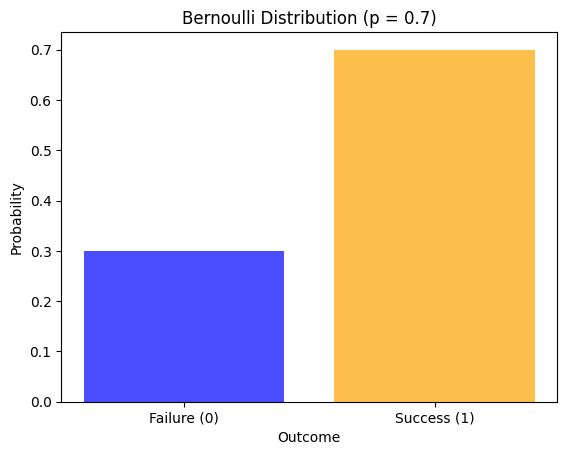

In [43]:
from scipy.stats import bernoulli

# Set the probability of success (p)
p = 0.7  # You can change this to any value between 0 and 1

# Create sample data from Bernoulli distribution
n_samples = 1000
data = bernoulli.rvs(p, size=n_samples)

# Plot the PDF of Bernoulli distribution
x = [0, 1]
pmf = [1 - p, p]

plt.bar(x, pmf, color=['blue', 'orange'], alpha=0.7)
plt.xticks(x, ['Failure (0)', 'Success (1)'])
plt.title(f'Bernoulli Distribution (p = {p})')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.show()


##**5.2 Logistic function (probability form)**


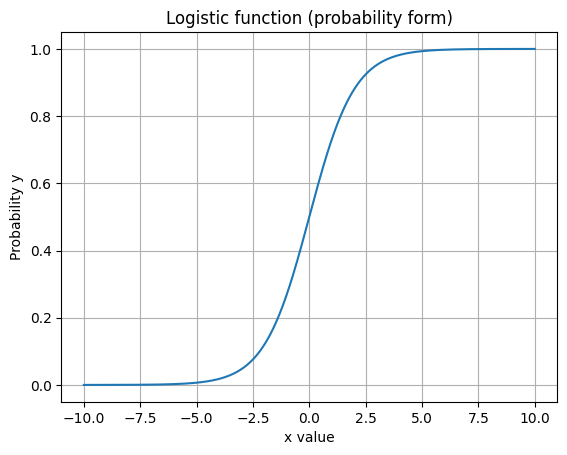

In [58]:

# 입력 값 x 생성 (-10부터 10까지 1000개의 값)
x = np.linspace(-10, 10, 1000)

# 로지스틱 함수 계산: y = 1 / (1 + exp(-x))
y = 1 / (1 + np.exp(-x))

# 로지스틱 함수 그래프 그리기
plt.plot(x, y)
plt.title('Logistic function (probability form)')
plt.xlabel('x value')
plt.ylabel('Probability y')
plt.grid(True)
plt.show()


##**5.4 Data**

In [45]:
# @title  나이, 연령  그룹, 심장병 여부 데이터 생성
data = {
    'ID': list(range(1, 101)),  # 1부터 100까지의 ID 리스트 생성
    # range(1, 101)을 사용한 이유는 파이썬의 range() 함수가 시작 값은 포함하지만 종료 값은 포함하지 않기 때문임. 따라서, range(1, 101)을 사용하면 1부터 100까지의 숫자가 생성됩

    'AGE': [  # 나이 데이터
        20, 23, 24, 25, 25, 26, 26, 28, 28, 29,
        30, 30, 30, 30, 30, 30, 32, 32, 33, 33,
        34, 34, 34, 34, 34, 35, 35, 36, 36, 36,
        37, 37, 37, 38, 38, 39, 39, 40, 40, 41,
        41, 42, 42, 42, 42, 43, 43, 43, 44, 44,

        44, 44, 45, 45, 46, 46, 47, 47, 47, 48,
        48, 48, 49, 49, 49, 50, 50, 51, 52, 52,
        53, 53, 54, 55, 55, 55, 56, 56, 56, 57,
        57, 57, 57, 57, 57, 58, 58, 58, 59, 59,
        60, 60, 61, 62, 62, 63, 64, 64, 65, 69
    ],
    'AGRP': [  # 연령 그룹 데이터
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

        4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
        6, 6, 6, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8
    ],
    'CHD': [  # 심장병 여부 데이터 (0: 없음, 1: 있음)
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 0,

        1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1
    ]
}

# 데이터 프레임 생성
df = pd.DataFrame(data)


In [46]:
# @title  데이터프레임(df)의 첫 5 행 출력
print(df.head())

   ID  AGE  AGRP  CHD
0   1   20     1    0
1   2   23     1    0
2   3   24     1    0
3   4   25     1    0
4   5   25     1    1


In [47]:
# @title output dimension of data frame
df.shape

(100, 4)

In [48]:
# @title check number of nulls and data type of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      100 non-null    int64
 1   AGE     100 non-null    int64
 2   AGRP    100 non-null    int64
 3   CHD     100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


In [49]:
# @title  output variable name set of data frame
df.columns

Index(['ID', 'AGE', 'AGRP', 'CHD'], dtype='object')

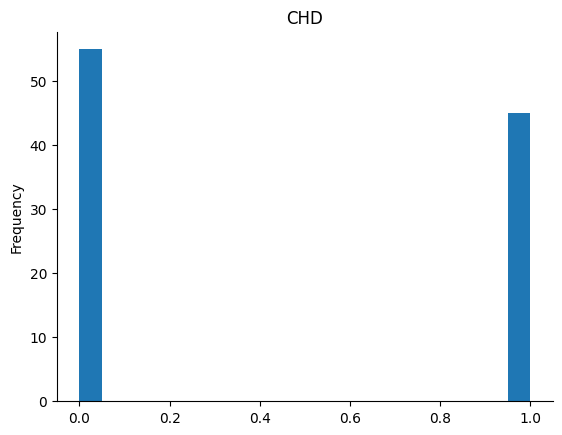

In [50]:
# @title CHD (심장병 여부)

from matplotlib import pyplot as plt
df['CHD'].plot(kind='hist', bins=20, title='CHD')
plt.gca().spines[['top', 'right',]].set_visible(False)

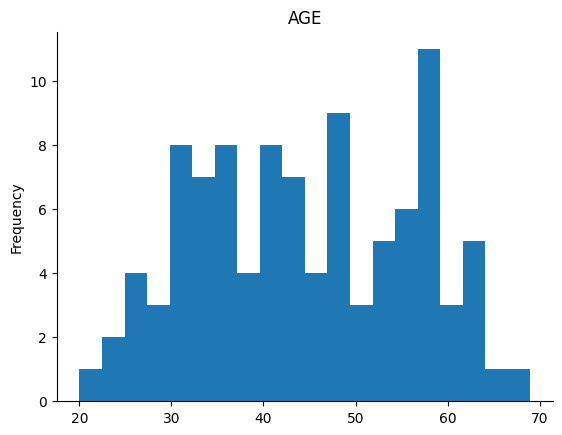

In [51]:
# @title AGE(나이)

from matplotlib import pyplot as plt
df['AGE'].plot(kind='hist', bins=20, title='AGE')
plt.gca().spines[['top', 'right',]].set_visible(False)

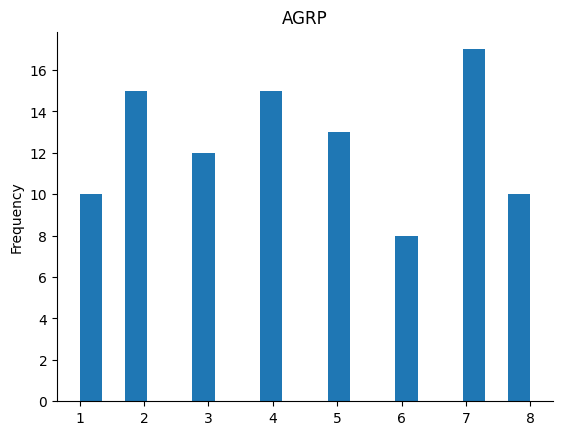

In [52]:
# @title AGRP (나이그룹)

from matplotlib import pyplot as plt
df['AGRP'].plot(kind='hist', bins=20, title='AGRP')
plt.gca().spines[['top', 'right',]].set_visible(False)

##**5.5 Results**


In [53]:
# @title 로지스틱 회귀 모델 생성 및 적합

import statsmodels.api as sm

# 로지스틱 회귀 수행
# 독립 변수(나이 AGE), 종속 변수(심장병 여부 CHD)
X = df[['AGE']]  # 나이(AGE)를 독립 변수로 설정
y = df['CHD']  # 심장병 여부(CHD)를 종속 변수로 설정

# 상수항 추가 (절편)
X = sm.add_constant(X)

# 로지스틱 회귀 모델 적합
model = sm.Logit(y, X)
result = model.fit()


Optimization terminated successfully.
         Current function value: 0.557877
         Iterations 6


In [54]:
# @title 로지스틱 회귀 출력 (요약)

# 모델 요약 출력 (선택 사항)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                    CHD   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                  0.1893
Time:                        08:54:24   Log-Likelihood:                -55.788
converged:                       True   LL-Null:                       -68.814
Covariance Type:            nonrobust   LLR p-value:                 3.323e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7812      1.069     -4.471      0.000      -6.877      -2.685
AGE            0.1018      0.023      4.437      0.000       0.057       0.147


In [55]:
# @title  새로운 나이 범위에 대한 예측 확률 계산

# 나이 범위를 200개의 값으로 나누어 생성
AGE_min = df['AGE'].min()
AGE_max = df['AGE'].max()
AGE_new = np.linspace(AGE_min, AGE_max, 200)

# 새로운 데이터에 상수항 추가
X_new = sm.add_constant(AGE_new)

# 각 나이에 대한 심장병 발생 확률을 예측
y_pred = result.predict(X_new)


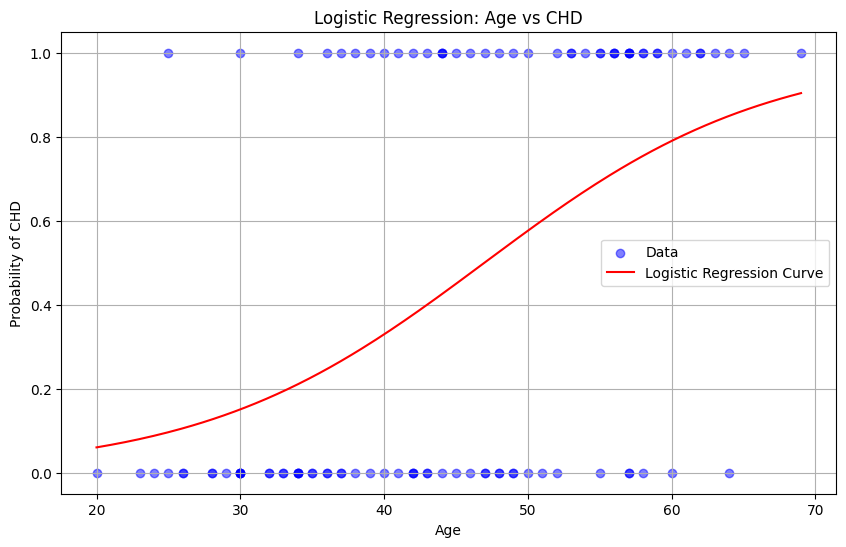

In [56]:
# @title  로지스틱 회귀 곡선 플롯팅
plt.figure(figsize=(10, 6))

# 실제 데이터 산포도
plt.scatter(df['AGE'], df['CHD'], color='blue', alpha=0.5, label='Data')

# 로지스틱 회귀로 예측한 곡선
plt.plot(AGE_new, y_pred, color='red', label='Logistic Regression Curve')

plt.xlabel('Age')  # x축 레이블: 나이
plt.ylabel('Probability of CHD')  # y축 레이블: 심장병 발생 확률
plt.title('Logistic Regression: Age vs CHD')  # 그래프 제목
plt.legend()  # 범례 표시
plt.grid(True)
plt.show()  # 그래프 출력